## Visualization of temperature in Berlin

In [ ]:
#!pip install geopandas==0.8.0
#!pip install folium

In [2]:
import pandas as pd 
import folium
import re
import geopandas as gpd
import random
import plotly.express as px

In [4]:
f = open('/home/lorena/Documents/bootcamp/W05/data/ECA_blended_custom/TG_STAID004563.txt')
df_lines = f.readlines()[19:]

df_berlin = pd.DataFrame(df_lines)
df_berlin = df_berlin[0].str.split(',', expand=True)
df_berlin = df_berlin.rename(columns=df_berlin.iloc[0])
df_berlin = df_berlin[1:]
df_berlin = df_berlin.replace('\n', '', regex=True)
df_berlin.columns = df_berlin.columns.str.lstrip()
df_berlin['district'] = 'Mitte'
df_berlin['TG'] = df_berlin['TG'].replace(-9999, df_berlin.loc['1945/04/25':'1945/11/25', 'TG'].mean())
df_berlin['TG'] = df_berlin['TG'].astype(float)
df_berlin['TG'] = df_berlin['TG'] * 0.1
df_berlin['DATE'] = pd.to_datetime(df_berlin['DATE'], format='%Y%m%d')
df_berlin['year'] = df_berlin['DATE'].dt.year 
#df_berlin = df_berlin.set_index('DATE')
df_berlin

,SOUID,DATE,TG,Q_TG\n,district,year
1,127488,1876-01-01,2.2,0,Mitte,1876
2,127488,1876-01-02,2.5,0,Mitte,1876
3,127488,1876-01-03,0.3,0,Mitte,1876
4,127488,1876-01-04,-5.8,0,Mitte,1876
5,127488,1876-01-05,-9.8,0,Mitte,1876
...,...,...,...,...,...,...
52865,121152,2020-09-26,10.1,0,Mitte,2020
52866,121152,2020-09-27,10.0,0,Mitte,2020
52867,121152,2020-09-28,13.8,0,Mitte,2020
52868,121152,2020-09-29,13.9,0,Mitte,2020


In [17]:
df_berlin_yearly = df_berlin.groupby('year')['TG'].mean()
df_berlin_yearly = pd.DataFrame(df_berlin_yearly)
df_berlin_yearly['city'] = 'Berlin'
df_berlin_yearly['country'] = 'Germany'
df_berlin_yearly['iso'] = 'DEU'
df_berlin_yearly['year'] = df_berlin_yearly.index
df_berlin_yearly

,TG,city,country,iso,year
year,,,,,
1876,9.320219,Berlin,Germany,DEU,1876
1877,9.727945,Berlin,Germany,DEU,1877
1878,10.236712,Berlin,Germany,DEU,1878
1879,8.180548,Berlin,Germany,DEU,1879
1880,9.805191,Berlin,Germany,DEU,1880
...,...,...,...,...,...
2016,10.738798,Berlin,Germany,DEU,2016
2017,10.464658,Berlin,Germany,DEU,2017
2018,11.595890,Berlin,Germany,DEU,2018


In [4]:
#Source: https://github.com/m-hoerz/berlin-shapes

berlin_bezirke = '/home/lorena/Documents/bootcamp/W05/data/berliner-bezirke.geojson'
geojson = open(berlin_bezirke).read()
districts = re.findall(r'spatial_alias": "([^,]+)",', geojson)

berlin_mitte = folium.Map(location=[52.54, 13.36],zoom_start=10,tiles='CartoDB positron')

berlin_mitte.choropleth(
    geo_data=berlin_bezirke,
    name='chloropleth',
    data=df_berlin,
    columns=['district', 'TG'],
    key_on='properties.spatial_alias',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Temperature in degrees Celsius'
)

folium.LayerControl().add_to(berlin_mitte)
berlin_mitte

In [67]:
import json
berlin_years = df_berlin_yearly[df_berlin_yearly['year'] >= 1990]
berlin_years_json = berlin_years.to_json()
json_years = json.loads(berlin_years_json)


berlin_px = px.choropleth_mapbox(
    mapbox_style='open-street-map',
    data_frame=berlin_years,
    geojson=json_years,
    featureidkey='country',        
    locations="country",               
    color="TG",
    center={"lat": 52.54, "lon": 13.36},
    #hover_name="city",  
    animation_frame='year',
    animation_group='iso',    
    color_continuous_scale='Plasma',
    range_color=(-3,3)
                
)

berlin_px.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

berlin_px.show()
berlin_px.write_html("berlin_chloropeth_allyears.html", include_plotlyjs='cdn')

In [38]:
gapminder = px.data.gapminder()
gapminder_map = px.choropleth(gapminder,               
              locations="iso_alpha",               
              color="gdpPercap",
              hover_name="country",  
              animation_frame="year",    
              color_continuous_scale='Plasma',  
              height=600             
)

gapminder_map.show()

## VIENNA

In [28]:
vienna_file = '/home/lorena/Documents/bootcamp/W05/data/ECA_blended_custom_wien/TG_STAID000016.txt'
f = open(vienna_file)
vienna_lines = f.readlines()[19:]
vienna_df = pd.DataFrame(vienna_lines)
vienna_df = vienna_df[0].str.split(',', expand=True)
vienna_df = vienna_df.rename(columns=vienna_df.iloc[0])
vienna_df = vienna_df[1:]
vienna_df = vienna_df.replace('\n', '', regex=True)
vienna_df.columns = vienna_df.columns.str.lstrip()
vienna_df['TG'] = vienna_df['TG'].astype('float')
vienna_df['TG'] = vienna_df['TG'] * 0.1
vienna_df['DATE'] = pd.to_datetime(vienna_df['DATE'], format='%Y%m%d')
vienna_df = vienna_df['TG']
vienna_df = pd.DataFrame(vienna_df)

In [27]:
shapefile = '/home/lorena/Documents/bootcamp/W05/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)

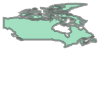

In [51]:
# Print the shape of a country
gdf['geometry'][3]

In [70]:
# Avg. temperature in Vienna per year
vienna_year = vienna_df.groupby(vienna_df.index.year)['TG'].mean()
vienna_year = pd.DataFrame(vienna_year)
vienna_year['country'] = 'Austria'
vienna_year['city'] = 'Vienna'
vienna_year['year'] = vienna_year.index
vienna_year.head()

,TG,country,city,year
DATE,,,,
1979,10.253973,Austria,Vienna,1979
1980,9.413934,Austria,Vienna,1980
1981,10.838904,Austria,Vienna,1981
1982,10.652329,Austria,Vienna,1982
1983,11.506849,Austria,Vienna,1983
1984,10.048634,Austria,Vienna,1984
1985,9.778082,Austria,Vienna,1985
1986,10.337534,Austria,Vienna,1986
1987,9.948767,Austria,Vienna,1987


In [73]:
# Merge the two dataframes
gdf_merged = gdf.merge(vienna_year, left_on='SOVEREIGNT', right_on='country')
gdf_merged.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,TG,country,city,year
0,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",10.253973,Austria,Vienna,1979
1,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",9.413934,Austria,Vienna,1980
2,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",10.838904,Austria,Vienna,1981
3,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",10.652329,Austria,Vienna,1982
4,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",11.506849,Austria,Vienna,1983
5,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",10.048634,Austria,Vienna,1984
6,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",9.778082,Austria,Vienna,1985
7,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",10.337534,Austria,Vienna,1986
8,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",9.948767,Austria,Vienna,1987
9,Admin-0 country,1,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,Австрия,Österrike,Avusturya,Áo,奥地利,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",11.097268,Austria,Vienna,1988


In [23]:
gdf_2000 = gdf_merged[gdf_merged['year'] == 2000]
json_2000 = gdf_2000.to_json()

NameError: name 'gdf_merged' is not defined

In [24]:
basemap = folium.Map(location=[48.210033, 16.363449],zoom_start=10,tiles='CartoDB positron')
basemap.save('index.html')

vienna_data = folium.Choropleth(
            geo_data=json_2000,                          # geojson string that includes the geo data (for the year 2000)
            name="chloropeth",
            data=gdf_2000,                              # dataframe that includes the data (for the year 2000)
            columns=["country", "TG"], # names of the columns to include from the dataframe
            key_on="properties.NAME_EN",              # name of JSON key within the "properties" value that contains country names
            fill_color="YlOrRd",                    # play around with the rest of the aesthetic options
            nan_fill_color="#ededed",         
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name="Mean temperature in Vienna",
            highlight=True,
        )

vienna_data.add_to(basemap)
basemap

NameError: name 'json_2000' is not defined